In [1]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

#Upload from csv
data_set_path = "school_attendance.csv"

#Read data and results
data_set_df = pd.read_csv(data_set_path)

data_set_df.head()


,District code,District name,Category,Student group,2021-2022 student count - year to date,2021-2022 attendance rate - year to date,2020-2021 student count,2020-2021 attendance rate,2019-2020 student count,2019-2020 attendance rate,Reporting period,Date update
0,00000CT,Connecticut,NaN,All Students,500285,0.9169,496092.0,0.9294,508346.0,0.9479,June 2022,07/22/2022
1,00000CT,Connecticut,Homelessness,Students Experiencing Homelessness,1814,0.8348,1735.0,0.8155,3916.0,0.8884,June 2022,07/22/2022
2,00000CT,Connecticut,Students With Disabilities,Students With Disabilities,78417,0.8899,76487.0,0.8946,80365.0,0.9277,June 2022,07/22/2022
3,00000CT,Connecticut,Free/Reduced Lunch,Free Meal Eligible,168984,0.8851,176225.0,0.8861,193706.0,0.9314,June 2022,07/22/2022
4,00000CT,Connecticut,Free/Reduced Lunch,Reduced Price Meal Eligible,29905,0.9184,30886.0,0.9299,27507.0,0.9518,June 2022,07/22/2022


In [36]:
#Filter
all_df = data_set_df.loc[(data_set_df["District name"]=="Connecticut")]
#Reduce
all_reduced_df = all_df[["District name", "Student group", "2021-2022 student count - year to date"]]
all_reduced_df["Count No"]

,District name,Student group,2021-2022 student count - year to date
0,Connecticut,All Students,500285
1,Connecticut,Students Experiencing Homelessness,1814
2,Connecticut,Students With Disabilities,78417
3,Connecticut,Free Meal Eligible,168984
4,Connecticut,Reduced Price Meal Eligible,29905
5,Connecticut,Free/Reduced Price Meal Eligible,198889
6,Connecticut,English Learners,43571
7,Connecticut,All other races,48700
8,Connecticut,Black or African American,63099
9,Connecticut,Hispanic/Latino of any race,146298


In [49]:
percent_yes=[]
percent_no={}
for i in all_reduced_df["2021-2022 student count - year to date"]:
    percent_yes.append(i)
    
    
percent_yes

[500285,
 1814,
 78417,
 168984,
 29905,
 198889,
 43571,
 48700,
 63099,
 146298,
 242188,
 241106,
 248239]

In [32]:
reduced = all_reduced_df.iloc[0][2]
reduced

0.9169

In [59]:
#Define Variables
reduced = all_reduced_df.iloc[0][2]
disabilities = all_reduced_df.iloc[2][2]
no_disabilities = reduced - disabilities
fr = all_reduced_df.iloc[5][2]
no_fr = reduced - fr
ell = all_reduced_df.iloc[6][2]
no_ell = reduced - ell
black = all_reduced_df.iloc[8][2]
no_black = reduced-black
his = all_reduced_df.iloc[9][2]
no_his = reduced-his
white = all_reduced_df.iloc[10][2]
no_white = reduced - white
no_needs = all_reduced_df.iloc[11][2]
needs = reduced - no_needs

#Find Percents and Define as variables
disabilities_percent = disabilities/reduced+100
no_disabilities_percent = 100-disabilities_percent
fr_percent = fr/reduced*100
no_fr_percent = 100 - fr_percent
ell_percent = ell/reduced*100
no_ell_percent = 100-ell_percent
black_percent = black/reduced*100
no_black_percent = 100-black_percent
his_percent = his/reduced*100
no_his_percent = 100-his_percent
white_percent = white/reduced*100
no_white_percent = 100-white_percent
needs_percent = needs/reduced*100
no_needs_percent = 100-needs_percent

all_percent = ell_percent+no_ell_percent
print(disabilities, no_ell_percent, all_percent)

78417 91.29076426436932 100.0


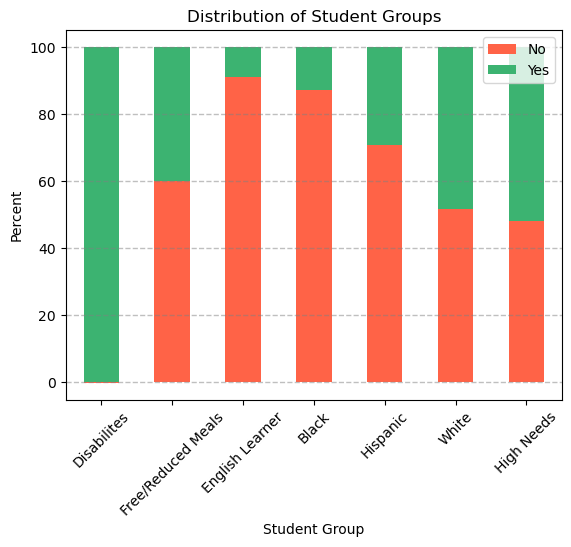

In [78]:
#Stacked Bar Graph
plotdata=pd.DataFrame({
    "No":[no_disabilities_percent, no_fr_percent, no_ell_percent, no_black_percent, no_his_percent, no_white_percent, no_needs_percent],
    "Yes":[disabilities_percent, fr_percent, ell_percent, black_percent, his_percent, white_percent, needs_percent]
        
    },
    index = ["Disabilites", "Free/Reduced Meals", "English Learner", "Black", "Hispanic", "White", "High Needs"])
plotdata.plot(rot=45, kind="bar", stacked = True, color={"No" : "tomato", "Yes": "mediumseagreen"})
plt.title("Distribution of Student Groups")
plt.xlabel("Student Group")
plt.ylabel("Percent")
plt.grid(color="gray", linestyle="--", linewidth=1, axis="y", alpha=0.5)

#Save image
plt.savefig("Images/StackedBar.png", bbox_inches="tight")

#Plot
plt.show()